In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Init scalers
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Load dataset
titanic = pd.read_csv("titanic.csv", header=0, sep=",")

# Normalize dataset
# Normalize sex
titanic['Sex'].replace(['female','male'],[0,1],inplace=True)
# Normalize parents - if needed
# titanic = titanic[titanic['Parents'] > 2]
titanic['Parents'] = std_scaler.fit_transform(titanic[['Parents']])
# Normalize siblings
titanic['Siblings'] = std_scaler.fit_transform(titanic[['Siblings']])
# Normalize age
titanic['Age'] = std_scaler.fit_transform(titanic[['Age']])
# Normalize passenger class
p_classes = pd.get_dummies(titanic.Pclass, prefix='Class')
titanic = titanic.join(p_classes).drop(['Pclass'], axis=1)
# Normalize fare
titanic['Fare'] = std_scaler.fit_transform(titanic[['Fare']])

titanic = sk.utils.shuffle(titanic)

# Split dataset to train, test and valid
train, test = np.split(titanic, [int(.7*len(titanic))])

# Create train and test set
train_labels = train['Survived']
train_data = train.drop(['Survived', 'Name'], axis=1)
test_labels = test['Survived']
test_data = test.drop(['Survived', 'Name'], axis=1)




In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Create tensors from train and test set
train_data_tensor = torch.FloatTensor(train_data.values)
train_label_tensor = torch.LongTensor(train_labels.values)
test_data_tensor = torch.FloatTensor(test_data.values)
test_label_tensor = torch.LongTensor(test_labels.values)

In [3]:
# Initialize hyperparameters
input_size = 8
output_size = 2
hidden_size1 = 64
hidden_size2 = 56
epochs = 50
learning_rate = 0.005

# Initialize model class with layers and activation functions
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(in_features=input_size, out_features=hidden_size1)
        self.fc2 = nn.Linear(in_features=hidden_size1, out_features=hidden_size2)
        self.output = nn.Linear(in_features=hidden_size2, out_features=output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x

# Create net instance, loss function and optimizer
net = Network()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [4]:
# Train model on train data tensors
loss_arr = []
for i in range(epochs):
    y_hat = net.forward(train_data_tensor)
    loss = criterion(y_hat, train_label_tensor)
    loss_arr.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch: {i} \t Loss: {loss}')

Epoch: 0 	 Loss: 0.6799057722091675
Epoch: 1 	 Loss: 0.6561161875724792
Epoch: 2 	 Loss: 0.6360313892364502
Epoch: 3 	 Loss: 0.6180565357208252
Epoch: 4 	 Loss: 0.6013931035995483
Epoch: 5 	 Loss: 0.5857210159301758
Epoch: 6 	 Loss: 0.5709347724914551
Epoch: 7 	 Loss: 0.5569072365760803
Epoch: 8 	 Loss: 0.5434609651565552
Epoch: 9 	 Loss: 0.5307271480560303
Epoch: 10 	 Loss: 0.5183183550834656
Epoch: 11 	 Loss: 0.5056427717208862
Epoch: 12 	 Loss: 0.4922598600387573
Epoch: 13 	 Loss: 0.47856584191322327
Epoch: 14 	 Loss: 0.465663880109787
Epoch: 15 	 Loss: 0.45447593927383423
Epoch: 16 	 Loss: 0.4455397129058838
Epoch: 17 	 Loss: 0.4390864074230194
Epoch: 18 	 Loss: 0.43480464816093445
Epoch: 19 	 Loss: 0.43157413601875305
Epoch: 20 	 Loss: 0.4288713037967682
Epoch: 21 	 Loss: 0.42647430300712585
Epoch: 22 	 Loss: 0.4243113398551941
Epoch: 23 	 Loss: 0.42229998111724854
Epoch: 24 	 Loss: 0.4197348356246948
Epoch: 25 	 Loss: 0.4161626994609833
Epoch: 26 	 Loss: 0.41186627745628357
Epoch

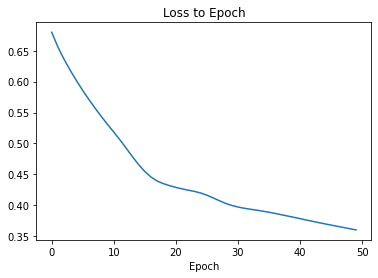

In [5]:
import matplotlib.pyplot as plt

# Plot graph of loss function
plt.title('Loss to Epoch')
plt.xlabel("Loss")
plt.xlabel("Epoch")
plt.plot(loss_arr)

In [10]:
# Test model on test set
predictions = []
with torch.no_grad():
    for val in test_data_tensor:
        y_hat = net.forward(val)
        predictions.append(y_hat.argmax().item())

# Create dataframe with ground truth values and predicted values
correct_sum = 0
for corr, pred in zip(test_label_tensor, predictions):
    correct_sum += 1 if corr == pred else 0

# Print accuracy
print("Accuracy of model is: " + str(correct_sum / len(predictions)))


Accuracy of model is: 0.8277153558052435


In [15]:
import tensorflow
from tensorflow import keras

keras.backend.clear_session()
#np.random.seed(42)
#tf.random.set_seed(42)

model = keras.models.Sequential([       
                                    keras.layers.Dense(hidden_size1, activation="relu", input_dim=8),
                                    #keras.layers.Dropout(0.2),
                                    keras.layers.Dense(hidden_size2, activation="relu"),
                                    #keras.layers.Dropout(0.2),
                                    keras.layers.Dense(1, activation="sigmoid"),
                                ])

model.compile(loss="binary_crossentropy",              
              optimizer="adam",
              metrics=["accuracy"])

model.summary()
result = model.fit(train_data.values, train_labels.values, epochs=50,
                     validation_data=(test_data.values, test_labels.values))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 56)                3640      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 57        
Total params: 4,273
Trainable params: 4,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.6810 - accuracy: 0.6003 - val_loss: 0.5838 - val_accuracy: 0.7416
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7072 - val_loss: 0.5233 - val_accuracy: 0.7378
Epoch 3/50
20/20 [==============

Accuracy of model is: 0.8596774339675903
Accuracy of validation set  is: 0.8277153372764587


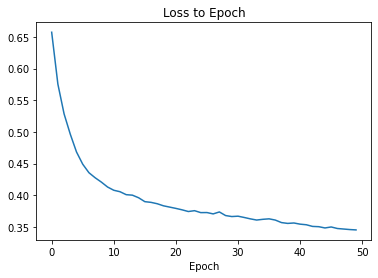

In [17]:
# Plot graph of loss function
plt.title('Loss to Epoch')
plt.xlabel("Loss")
plt.xlabel("Epoch")
plt.plot(result.history['loss'])

print("Accuracy of model is: " + str(result.history['accuracy'][-1]))
print("Accuracy of validation set  is: " + str(result.history['val_accuracy'][-1]))
